## Problem - 1
Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

In [51]:
#Non-Random Pivot
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[-1]  
        left = [x for x in arr[:-1] if x <= pivot] 
        right = [x for x in arr[:-1] if x > pivot] 
        return quicksort(left) + [pivot] + quicksort(right)

arr = [10, 7, 8, 9, 1, 5]
print("Sorted array(non-random):", quicksort(arr))


#Random Pivot
import random
def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot_index = random.randint(0, len(arr) - 1) 
        pivot = arr[pivot_index]
        left = [x for x in arr if x < pivot] 
        right = [x for x in arr if x > pivot]  
        equal = [x for x in arr if x == pivot]  
        return quicksort_random(left) + equal + quicksort_random(right)

arr = [10, 7, 8, 9, 1, 5]
print("Sorted array(random):", quicksort_random(arr))

Sorted array(non-random): [1, 5, 7, 8, 9, 10]
Sorted array(random): [1, 5, 7, 8, 9, 10]


## Problem - 2

For the non-random pivot version of quicksort show the following benchmarks on the same graph:

    2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

    2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

    2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

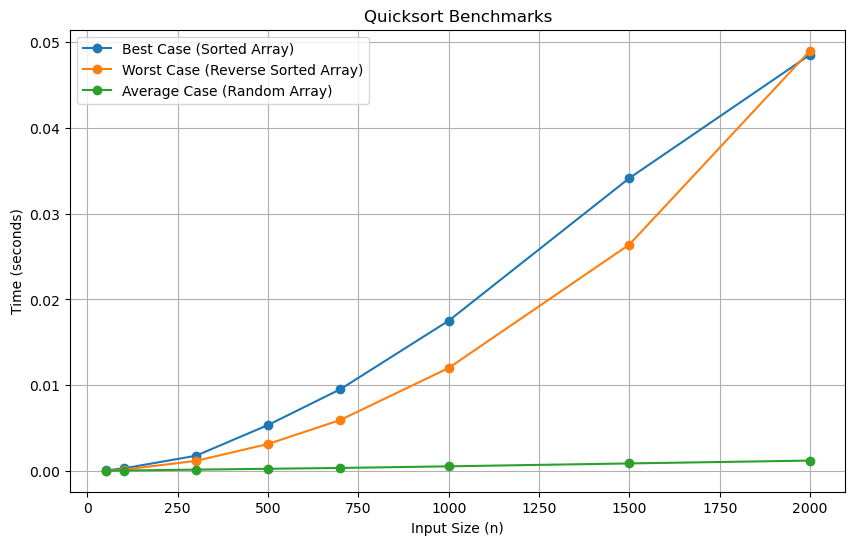

In [53]:
import time
import random
import matplotlib.pyplot as plt

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[-1]  
        left = [x for x in arr[:-1] if x <= pivot]  
        right = [x for x in arr[:-1] if x > pivot]  
        return quicksort(left) + [pivot] + quicksort(right)

def benchmark_quicksort(input_generator, sizes):
    times = []
    for size in sizes:
        arr = input_generator(size)
        start_time = time.time()
        quicksort(arr)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def best_case_input(size):
    return list(range(size))

def worst_case_input(size):
    return list(range(size, 0, -1))

def average_case_input(size):
    return [random.randint(0, 1000) for _ in range(size)]

def plot_benchmarks(sizes, best_times, worst_times, avg_times):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, best_times, label='Best Case (Sorted Array)', marker='o')
    plt.plot(sizes, worst_times, label='Worst Case (Reverse Sorted Array)', marker='o')
    plt.plot(sizes, avg_times, label='Average Case (Random Array)', marker='o')
    
    plt.title('Quicksort Benchmarks')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

sizes = [50, 100, 300, 500, 700, 1000, 1500, 2000]

best_times = benchmark_quicksort(best_case_input, sizes)
worst_times = benchmark_quicksort(worst_case_input, sizes)
avg_times = benchmark_quicksort(average_case_input, sizes)

plot_benchmarks(sizes, best_times, worst_times, avg_times)

## Problem - 3

Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

In the average case, the pivot splits the array into two approximately equal parts. So, k is approximately n/2, leading to:


T(n) = 2T(n/2) + O(n)

We can solve this recurrence relation using the master theorem for divide-and-conquer recurrences. The general form of the recurrence is:

T(n) = aT(n/b) + O(n^d)

In our case, a = 2, b = 2, and d = 1 (since the partitioning takes linear time O(n)).

To apply the master theorem, we compare n^d with n^(logb(a)):
d = 1
logb(a) = log2(2) = 1

Since d = logb(a), we are in the case where the master theorem gives the solution:
    
T(n) = O(n^d logn) = O(nlogn)

The average time complexity of the non-random pivot version of Quicksort is O(nlogn). This is because, on average, the pivot splits the array into two roughly equal parts, leading to logarithmic depth of recursion, and each level of recursion requires linear time for partitioning. Therefore, the overall average runtime complexity is O(nlogn).
